# 의사결정트리(Decision Tree)

* 분류, 회귀 작업에 사용되며, 복잡한 데이터셋도 학습할 수 있음
* 설명하기도 쉽고 해석하기도 쉬우면서 나이브 베이즈와 같이 범주형 데이터를 잘 다룰 수 있음
* 의사결정 트리는 강력한 ML 알고리즘 가운데 하나인 `랜덤 포레스트`의 기본 구성 요소
  (랜덤 포레스트는 부트 스트랩 aggregating이라고 하는 배깅 기법을 사용)
* ID3, C4.5, CART, CHAID와 같은 알고리즘이 있음

# 의사결정트리 생성

* 데이터를 분할하기 위해 가장 중요한 특징이 무엇인지 선택하는 local 최적화 방법을 계속 적용하는 Greedy 방식으로 트리를 생성함 
* 의사결정 트리는 학습 샘플을 서브셋으로 분할하면서 생성되며, 분할의 과정은 각 서브셋에 대해 재귀 형태로 진행됨
* 각 노드에서의 분할은 특징값을 기반으로 조건 검사를 통해 진행되며, 서브셋이 동일한 클래스 레이블을 가지는 경우나 분할을 통한 클래스 분류가 더 이상 의미가 없을 경우 분할이 완료.

# CART 알고리즘

* Classification And Regression Tree
* node를 왼쪽, 오른쪽 자식 노드로 분할 확장하면서 트리를 생성함
* 분할 단계에서 가장 중요한 특징과 해당 값의 모든 가능한 조합을 측정 함수를 이용해 탐욕적으로 찾음
* 범주형 특징의 경우 해당 특징값을 가진 샘플들을 오른쪽 자식 노드에 할당함
* 수치형 특징의 경우 해당 값보다 큰 값을 가진 샘픔들을 오른쪽 자식 노드에 할당함

## CART 트리 분할의 측정 기준

### 지니 불순도 : Gini Impurity

* 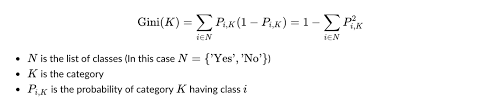 <br>
$P_(i,k)$ : i번째 노드에 있는 훈련 샘플 중 k클래스에 속한 샘플의 비율

* 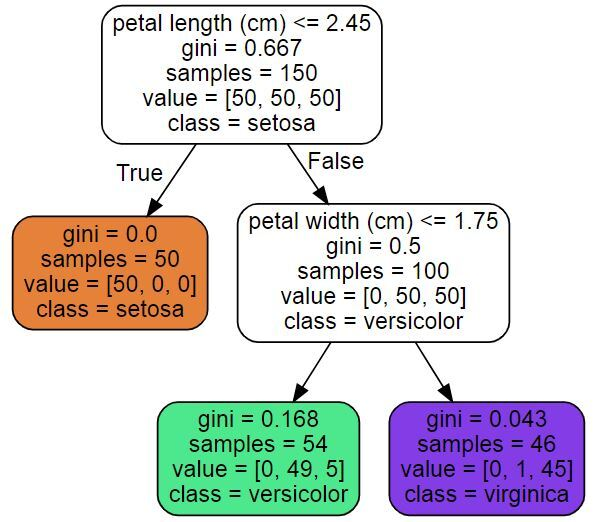 <br>
루트 노드(Root Node): 깊이가 0인 맨 꼭대기의 노드 <br>
리프 노드(Leaf Node): 자식 노드를 가지지 않는 노드 <br>
samples 속성: 얼마나 많은 훈련 샘풀이 적용되었는지 <br>
value 속성: 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 <br>
Gini 속성: 불순도를 측정 <br>
즉, 한 노드의 모든 샘플이 같은 클래스에 속해 있다면, 이 노드를 순수(gini = 0)하다고 한다. <br>
ex) 위 그림에서, 깊이 2의 왼쪽 노드의 gini 점수는 1 - (0 / 54)^2 - (49 / 54) ^2 - (5 / 54) ^2 = 0.168


* 한 노드에 모든 샘플이 같은 클래스에 있을 경우 순수하다고 한다. (gini == 0)
* max depth의 parameter 조정으로 depth 분할을 정지시킬 수 있다.


### 비용함수

* CART가 분류에 대해 최소화해야 하는 비용함수
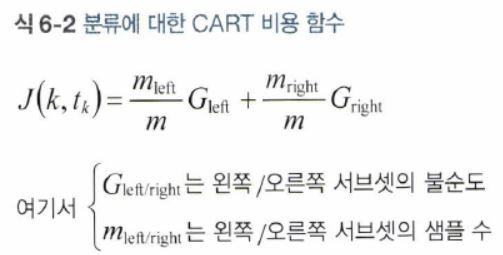

* CART 알고리즘이 subset을 나누는 과정은 max_depth가 되면 중지하거나, 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 된다. <br>
(max_depth 외에도 min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes와 같은 매개변수도 중지 조건에 관여한다.)

# scikit-learn의 의사결정트리 분류기 사용

## iris dataset load

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 특징행렬 만들기

In [5]:
# 특징행렬 만들기
# 'petal length (cm)',
# 'petal width (cm)'
X = iris.data[:, 2:]

## 대상벡터 만들기

In [6]:
# 대상벡터 만들기
import numpy as np

np.unique(iris.target, return_counts=True)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
y = iris.target

## DecisionTreeClassifer model 객체 생성 및 적합화

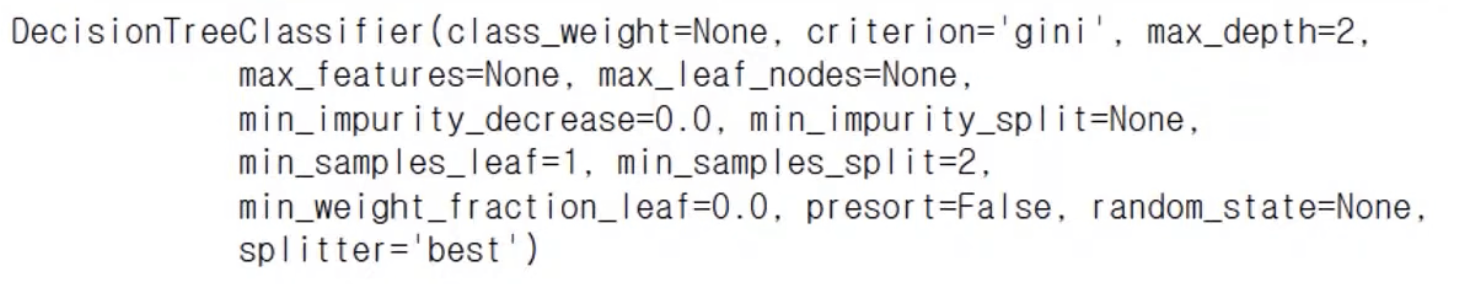

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)  # tree의 최대 depth를 2로.  p -> c1- > c2
tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## 트리 출력하기

export_graphviz

In [9]:
from sklearn.tree import export_graphviz

# feature_name : petal length, petal width
# class_names : 분류기준 -> iris.target_names
# rounded : 트리의 노드 모양을 둥근 사각형
# filled : 중요한 노드에 색칠하기
# impurity : 지니 계수값 출력하기
export_graphviz(
    tree, out_file='iris.dot', feature_names=iris.feature_names[2:], \
    class_names=iris.target_names, rounded=True, filled=True, impurity=True
)


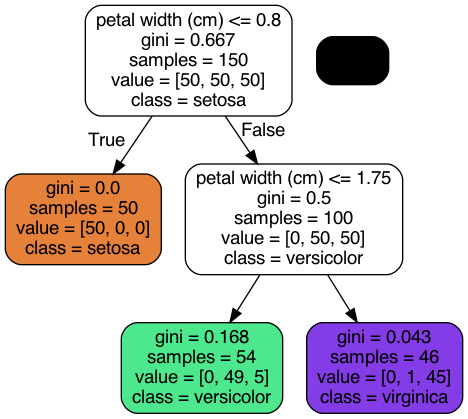

In [10]:
import pydot
from IPython.core.display import Image

graph = pydot.graph_from_dot_file('iris.dot')[0]
iris_png = graph.create_png()
Image(iris_png)

# feature를 'petal width', 'petal length' 두 개를 사용했는데,
# 'petal length'가 없는 것으로 보아 중요도가 높지 않음을 알 수 있다. (특징 중요도)

# 만약 petal width = 1.5(cm)인 새로운 data를 주면? 
# 초록색 박스로 분류되면서 의사결정이 된다.

# 의사결정 트리의 특징 중요도

* 의사결정 트리를 기반으로 하는 모델은 특징의 상대적 중요도를 측정하기 쉬운 장점을 지님
* 의사결정 트리는 일부 특징을 배제함
* 의사결정 트리의 각 노드에 사용된 특징 중요도
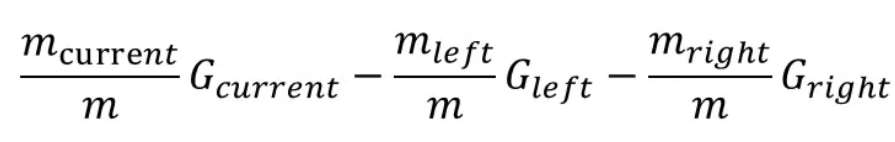
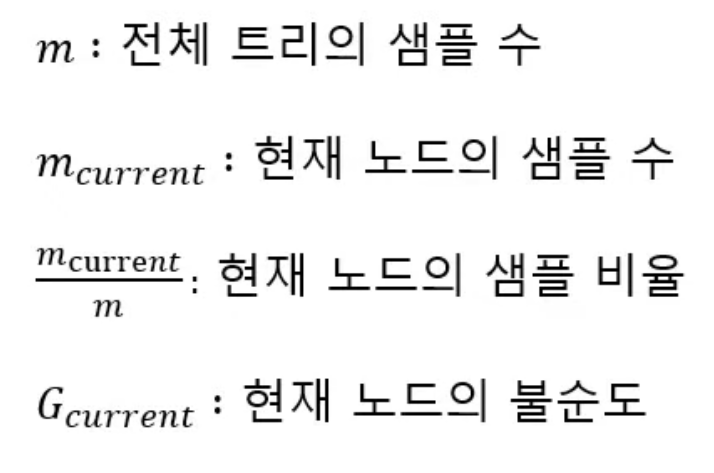
* 각 노드에 사용된 특징 중요도의 합이 1이 되도록 전체 합으로 나누어 정규화함

In [11]:
# tree를 생성하면, 'feature_importances_'라는 특징도 생성됨.

for feature, importance in zip(iris.feature_names[2:], tree.feature_importances_) :
    print("{} : {} " .format(feature, importance))

# 중요도가 1인 petal width만 남게됨
# 중요도가 0인 petal length는 배제됨

petal length (cm) : 0.0 
petal width (cm) : 1.0 
